In [88]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import IPython.display as disp
import time

# Christmas Specital (Tut09), Motivationsübung (nicht Prüfungsrelevant)

## Using Numpy and Matplotlib (Ex: Mandelbrod Set)

<img src="mandel2.png" hight="320px" width="480px" />

*Jochen Illerhaus*

# **Def:** Mandelbrot Set
Let $z_n \in \mathbb{C}$ be the series recursively defined by:
$$z_{n+1} = z_n^2 + c$$
with $z_0 = 0$.
<hr/>
The Mandelbrot Set $M$ is defined by:
$$M := \big\{ c \in \mathbb{C} \big| \; \; z_n \text{convergent} \big\}$$

## **Lemma:** Mandelbrot convergence Test
(Proof omitted) $$\exists n \in \mathbb{N}: \big| z_n \big| > 2 \Rightarrow z_n \text{divergent}$$

In [2]:
X = np.linspace(-2, 1, 842)
Y = np.linspace(-1.3, 1.3, 624)

x, y = np.meshgrid(X, Y)
c = x + 1j*y

z = np.zeros_like(c)

for n in range(50):
    z = z**2 + c
    
M = np.abs(z) <= 2
M = M.astype(np.float32)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in square
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less_equal
  if sys.path[0] == '':


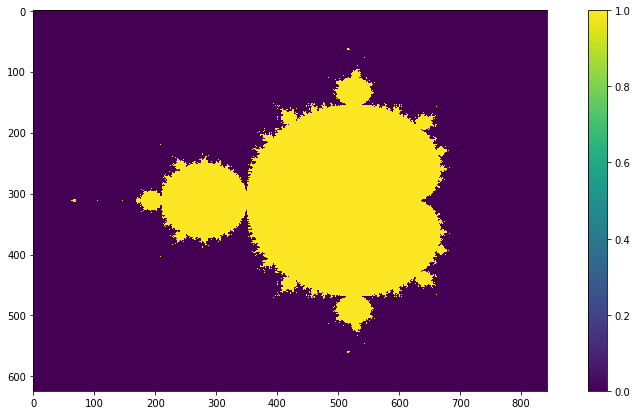

In [3]:
plt.figure(figsize=(15, 7))
plt.imshow(M)
plt.colorbar()

# Improving visual appeal

Idea: Encode info about speed of convergence in color

**Def: Convergence Number $N$** 
$$ N = \Big\{ n \in \mathbb{N} \; \Big| \; \big| z_n \big| > 2 \wedge \big| z_{n-1} \big| \le 2 \Big\}$$

In [5]:
max_iterations = 50

extent = [-2, 0.8, -1.3, 1.3]

X = np.linspace(*extent[:2], 842)
Y = np.linspace(*extent[2:], 624)

x, y = np.meshgrid(X, Y)
c = x + 1j*y

z = np.zeros_like(c)
z_next = np.zeros_like(c)

N = max_iterations*np.ones_like(c).astype(np.int32)

abs2 = lambda z: np.real(z)**2 + np.imag(z)**2

for n in range(max_iterations):
    z_next = z**2 + c
    N[np.logical_and(abs2(z_next)>4, abs2(z)<=4)] = n
    z = z_next

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in add
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in square
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less_equal


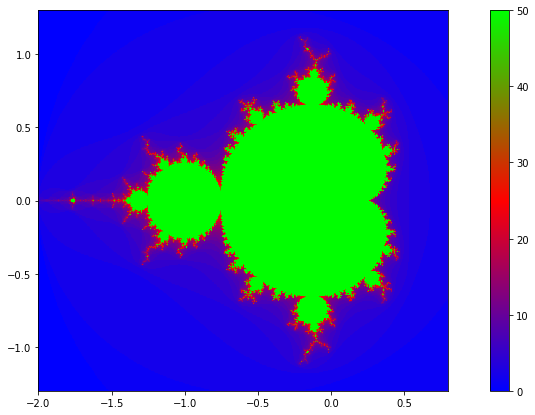

In [6]:
plt.figure(figsize=(15, 7))
plt.imshow(N, cmap=plt.cm.brg, extent=extent)
plt.colorbar()

# Putting it all together

In [114]:
def mandelbrot_img(iterations=50, extent=[-2, 0.8, -1.3, 1.3], res=(480, 320)):
    with np.warnings.catch_warnings():
        np.warnings.filterwarnings('ignore')
        X = np.linspace(*extent[:2], res[0])
        Y = np.linspace(*extent[2:], res[1])

        x, y = np.meshgrid(X, Y)
        c = x + 1j*y

        z = np.zeros_like(c)
        z_next = np.zeros_like(c)

        N = iterations*np.ones_like(c).astype(np.int32)

        abs2 = lambda z: np.real(z)**2 + np.imag(z)**2
        
        abs_old = np.zeros_like(c)
        abs_next = np.zeros_like(c)

        for n in range(iterations):
            z_next = z**2 + c
            abs_next = abs2(z_next)
            N[np.logical_and(abs_next>4, abs_old<=4)] = n
            z = z_next
            abs_old = abs_next
            
        return np.log(N)/np.log(2)
    
def mandelbrot(ax=None, iterations=50, extent=[-2, 0.8, -1.3, 1.3], img=None, res=(480, 320)):
        data = mandelbrot_img(iterations, extent, res)
        
        if ax is not None:
            img = ax.imshow(data, cmap=plt.cm.hot, extent=extent)
        else:
            img.set_data(data)
            img.set_extent(extent)
        return img

plotet img s = 1.500e+00, total itime: 5.363s
plotet img s = 4.500e-01, total itime: 5.389s
plotet img s = 1.350e-01, total itime: 5.543s
plotet img s = 4.050e-02, total itime: 5.282s
plotet img s = 1.215e-02, total itime: 5.109s
plotet img s = 3.645e-03, total itime: 5.339s
plotet img s = 1.093e-03, total itime: 5.478s
plotet img s = 3.280e-04, total itime: 5.359s
plotet img s = 9.841e-05, total itime: 5.319s
Done ploting toatal time: 49.351s


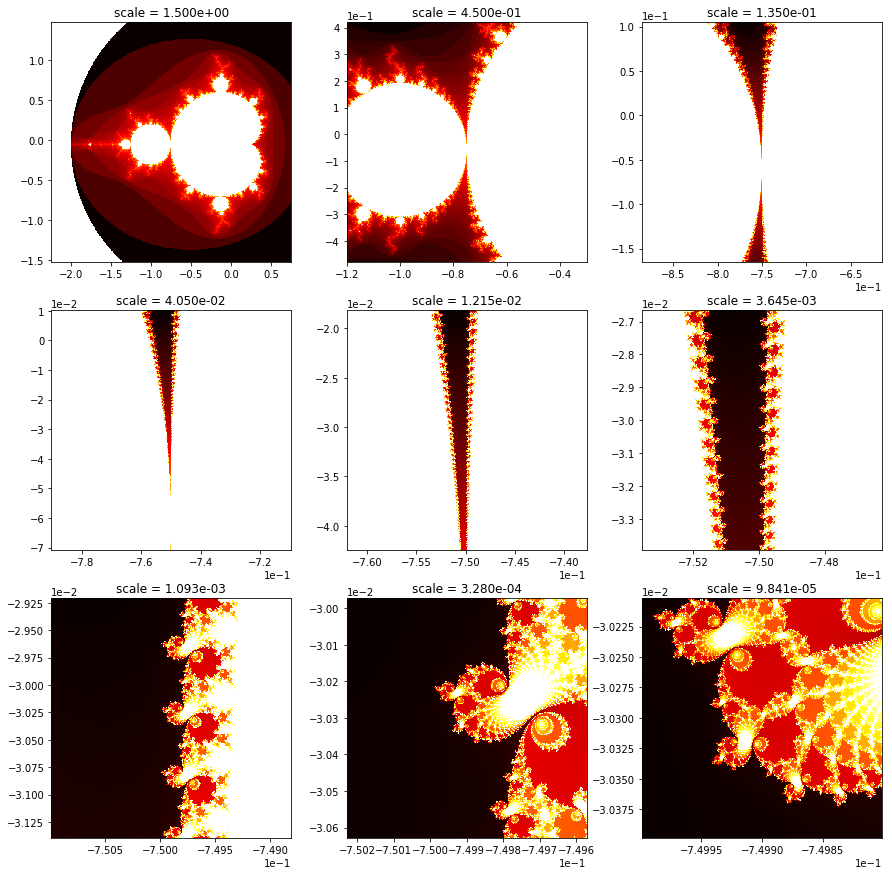

In [87]:
t_start = time.time()
a, b = 3, 3
I = a*b
fig, axs = plt.subplots(a, b, figsize=(15, 15))
c0 = -0.7499-0.0303j
s = 1.5
t_img = time.time()
for l in range(a):
    for m in range(b):
        mandelbrot(axs[l][m], 1000, [c0.real-s, c0.real+s, c0.imag-s, c0.imag+s])
        axs[l][m].set_title("scale = %3.3e" % s)
        axs[l][m].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        axs[l][m].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        t = time.time()
        print("plotet img s = %3.3e, total itime: %3.3fs" % (s, t - t_img))
        t_img = t
        s *= 0.3
print("Done ploting toatal time: %3.3fs" % (time.time() - t_start))

In [141]:
t_start = time.time()
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
c0 = -0.7499-0.0303j
s = 1.5
img = mandelbrot(ax, 3000, [c0.real-s, c0.real+s, c0.imag-s, c0.imag+s], None)
ax.set_title("scale = %3.3e" % s)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

def animate(i):
    global s, c0, img, ax
    img = mandelbrot(None, 9000, [c0.real-s, c0.real+s, c0.imag-s, c0.imag+s], img, res=(320, 320))
    ax.set_title("scale = %3.3e" % s)
    s *= 0.84
    print("rendered frame number = %s" % i)
    return img, ax

animation = ani.FuncAnimation(fig, animate, np.linspace(0, 240, 240), interval=1, blit=False)

animation.save('m-ani.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

print("Done ploting toatal time: %3.3fs" % (time.time() - t_start))

plt.close()

rendered frame number = 0.0
rendered frame number = 0.0
rendered frame number = 1.00418410042
rendered frame number = 2.00836820084
rendered frame number = 3.01255230126
rendered frame number = 4.01673640167
rendered frame number = 5.02092050209
rendered frame number = 6.02510460251
rendered frame number = 7.02928870293
rendered frame number = 8.03347280335
rendered frame number = 9.03765690377
rendered frame number = 10.0418410042
rendered frame number = 11.0460251046
rendered frame number = 12.050209205
rendered frame number = 13.0543933054
rendered frame number = 14.0585774059
rendered frame number = 15.0627615063
rendered frame number = 16.0669456067
rendered frame number = 17.0711297071
rendered frame number = 18.0753138075
rendered frame number = 19.0794979079
rendered frame number = 20.0836820084
rendered frame number = 21.0878661088
rendered frame number = 22.0920502092
rendered frame number = 23.0962343096
rendered frame number = 24.10041841
rendered frame number = 25.10460251

rendered frame number = 216.90376569


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 217.907949791


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 218.912133891


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 219.916317992


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 220.920502092


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 221.924686192


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 222.928870293


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 223.933054393


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 224.937238494


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 225.941422594


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 226.945606695


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 227.949790795


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 228.953974895


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 229.958158996


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 230.962343096


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 231.966527197


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 232.970711297


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 233.974895397


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 234.979079498


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))


rendered frame number = 235.983263598


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0303, top=-0.0303
  'bottom=%s, top=%s') % (bottom, top))


rendered frame number = 236.987447699


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0303, top=-0.0303
  'bottom=%s, top=%s') % (bottom, top))


rendered frame number = 237.991631799


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0303, top=-0.0303
  'bottom=%s, top=%s') % (bottom, top))


rendered frame number = 238.9958159


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.7499, right=-0.7499
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0303, top=-0.0303
  'bottom=%s, top=%s') % (bottom, top))


rendered frame number = 240.0
Done ploting toatal time: 6540.023s


In [143]:
%%html
<h3>9000 iterations, -0.7499-0.0303j, s*=0.84</h3>
<video width="640" height="480" controls>
  <source src="m-ani.mp4" type="video/mp4">
</video>
<h3>Older verison 3866.420s, 3000 iterations, -0.7499-0.0303j, s*=0.86</h3>
<video width="640" height="480" controls>
  <source src="m-ani-3000.mp4" type="video/mp4">
</video>

# How to improve this??

 * This is a demo for matplotlib and numpy (not a good demo on rendering Mandelbrot Sets)
 * Use difrent libraries, (TensorFlow, DataShader, ...)
 * Implement multi-threading yourself [see here](https://jakei.github.io/ParallelCPUMandelbrot/)
 * USE THE GPU (e.g. through GLSL and vispy or PyOpenGL)

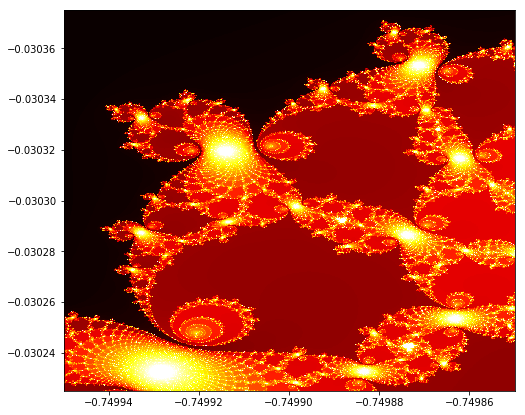

In [135]:
# Render Nice title Img
fig, ax = plt.subplots(1, 1, figsize=(18, 7))
mandelbrot(ax, 3000, [-0.74995, -0.74985, -0.030225, -0.030375], res=(820, 640))
ax.set_aspect(9/16)
fig.savefig("mandel.png")